# A PyHSPF study of monitoring water flowing in the Cimarron River near Ripley, OK

In [1]:
import os,datetime,pickle,numpy
from matplotlib import pyplot as plt
from pyhspf.preprocessing import NWISExtractor


gageid='07161450'
NWIS = 'NWIS-metadata'
watershed_HUC8='11050003'
directory = 'DATA-{}'.format(watershed_HUC8)

nwisextractor = NWISExtractor(NWIS)   #check the NWIS folder, see if it exists.


In [2]:
#download the metadata information of entire gagestations in USA.
#and extract selected metadata information into created 'DATA' forlder.
nwisextractor.extract_HUC8(watershed_HUC8, directory) 


NWIS directory NWIS-metadata exists

NWIS source metadata file NWIS-metadata/USGS_Streamgages-NHD_Locations_Shape.zip is present

gage metadata NWIS-metadata/USGS_Streamgages-NHD_Locations is present

gage station file DATA-07161450/gagestations exists



In [3]:
start = datetime.datetime(1930, 1, 1)      # start date for timeseries
end   = datetime.datetime(2020, 1, 1)      # end date for timeseries
gagepath='{}/gagedata'.format(directory)
if not os.path.isdir(gagepath):
    nwisextractor.download_all(start, end, output = gagepath)
    
gagedata  = 'Cimarron River near Ripley'
nwisextractor.download_gagedata(gageid, start, end, output = gagedata)



gage data for 07161450 exist



In [4]:
print('The water flow information for the Cimarron River near Ripley, OK')
print('')

p = '{}/{}'.format(gagepath,gageid)    #identify p as the picked_gageid file 
                                           #under 'data-curves' folder.
with open(p, 'rb') as f:      #open p file and ensure the file is 'clean up' 
                              #after finish the process
        
    station = pickle.load(f)      #to load pickled data from p file

# the following are attributes of the station directly from the database
print('Gage ID:                     ', station.gageid)
print('Name:                        ', station.name)
print('State:                       ', station.state)
print('First day of measurement:    ', station.day1)
print('Last day of measurement:     ', station.dayn)
print('Drainage area (square miles):', station.drain)
print('Average flow (cfs):          ', station.ave)
print('NWIS url:                    ', station.web)

The water flow information for the Cimarron River near Ripley, OK

Gage ID:                      07161450
Name:                         Cimarron River near Ripley, OK
State:                        OK
First day of measurement:     19871001
Last day of measurement:      20040930
Drainage area (square miles): 17979.0
Average flow (cfs):           2220.978
NWIS url:                     http://waterdata.usgs.gov/nwis/nwisman/?site_no=07161450


The hydrograph and flow duration curve for site 07161450 in 2019


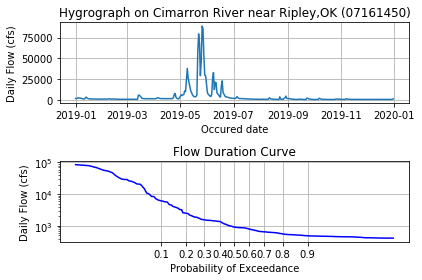

Maximum flow (cfs):        88800.0
Maximum flow occur at:     2019-05-26 00:00:00


In [26]:
s = datetime.datetime(2019, 1, 1)  # Start date 
e = datetime.datetime(2020, 1, 1)   # End date

data = station.make_timeseries(start = s, end = e)
deltat=datetime.timedelta(days=1)
  
a=[]
print('The hydrograph and flow duration curve for site {} in {}'.format(gageid,s.year))
for i in range(len(data)):
    a.append(s+i*deltat)

s1=plt.subplot(211)
s1.set_title('Hygrograph on Cimarron River near Ripley,OK ({})'.format(gageid))
s1.set_ylabel('Daily Flow (cfs)')
s1.set_xlabel('Occured date')
s1.plot(a,data)
plt.grid(True)

from scipy import stats
norm = stats.norm(0,1)
ticks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
norm_ticks = [norm.ppf(t) for t in ticks]    #Percent Points based on giving ticks


data1=data.copy()   # copy the array values from old one
data1.sort()       #rearrange array values from small to large
s2=plt.subplot(212)
s2.set_title('Flow Duration Curve')
s2.set_yscale('log')
s2.set_ylabel('Daily Flow (cfs)')
s2.set_xlabel('Probability of Exceedance')
s2.xaxis.set_ticks(norm_ticks)
s2.set_xticklabels(ticks)
daily=[norm.ppf(i/len(data1)) for i in range(len(data1))]
daily.reverse()
s2.plot(daily, data1, '-', color = 'blue')
plt.grid(True)
plt.tight_layout()
plt.show()


print('Maximum flow (cfs):       ', numpy.amax(data))
position = data.index(numpy.amax(data))  #find the MAX.occur position in the array
t_position=deltat*position+s

print('Maximum flow occur at:    ', t_position)

#print(norm_ticks)
#print(daily)   
#print(position)
#print(data1)